In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
#Since id variable has all unique values, removing it
df = df.drop('id',axis=1)

In [5]:
#since location values are not reliable as they are put by people, removing it
df = df.drop('location',axis=1)

In [6]:
df.shape

(7613, 3)

In [7]:
df.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   keyword  7552 non-null   object
 1   text     7613 non-null   object
 2   target   7613 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 178.6+ KB


In [9]:
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [10]:
df.sample(10)

,keyword,text,target
4790,loud%20bang,Nearly had a heart attack just now; loud bang ...,1
6872,trauma,Today was trauma on top of trauma on top of t...,0
3769,fire,In the words of Charlie Daniels 'Fire on the m...,1
4323,hijack,Bayelsa poll: Tension in Bayelsa as Patience J...,1
200,ambulance,HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPOND...,0
6972,tsunami,Meet Brinco your own personal earthquake snd t...,1
2698,detonation,Ignition Knock (Detonation) Sensor-Senso Stand...,0
3888,flattened,@GrabakaHitman @Izi_Garcia when he flattened m...,1
2386,derail,BBC News - India rail crash: Trains derail in ...,1
819,blizzard,@Ashayo @MsMiggi Hi Ashayo! I believe there wi...,1


In [11]:
#checking for null values
df.isnull().sum()/len(df)*100

keyword    0.801261
text       0.000000
target     0.000000
dtype: float64

In [12]:
#filling null values with unknown
df['keyword'] = df['keyword'].fillna('unknown')

In [13]:
df.isnull().sum()/len(df)*100

keyword    0.0
text       0.0
target     0.0
dtype: float64

In [14]:
#checking duplicate values
df.duplicated().sum()

72

In [15]:
#dropping duplicates
df.drop_duplicates(keep = 'first',inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
# Distribution of disaster and non-disaster tweets

print(df['target'].value_counts())
print((df['target'].value_counts()/df['target'].count())*100)

target
0    4317
1    3224
Name: count, dtype: int64
target
0    57.247049
1    42.752951
Name: count, dtype: float64


C:\Users\krish\AppData\Local\Temp\ipykernel_2136\69033045.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'], rotation=0)


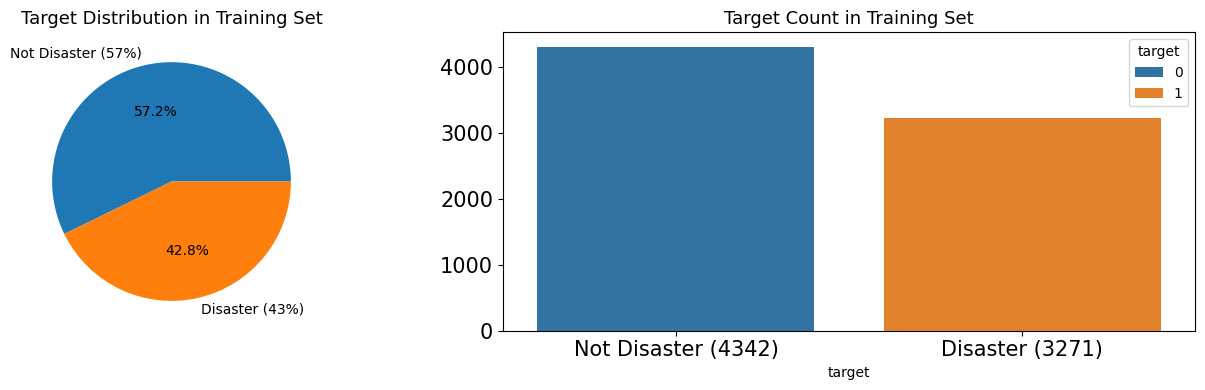

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), dpi=100)

df.groupby('target').count()['text'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'], autopct='%1.1f%%')
sns.countplot(x='target', data=df, hue='target', ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'], rotation=0)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.tight_layout()
plt.show()

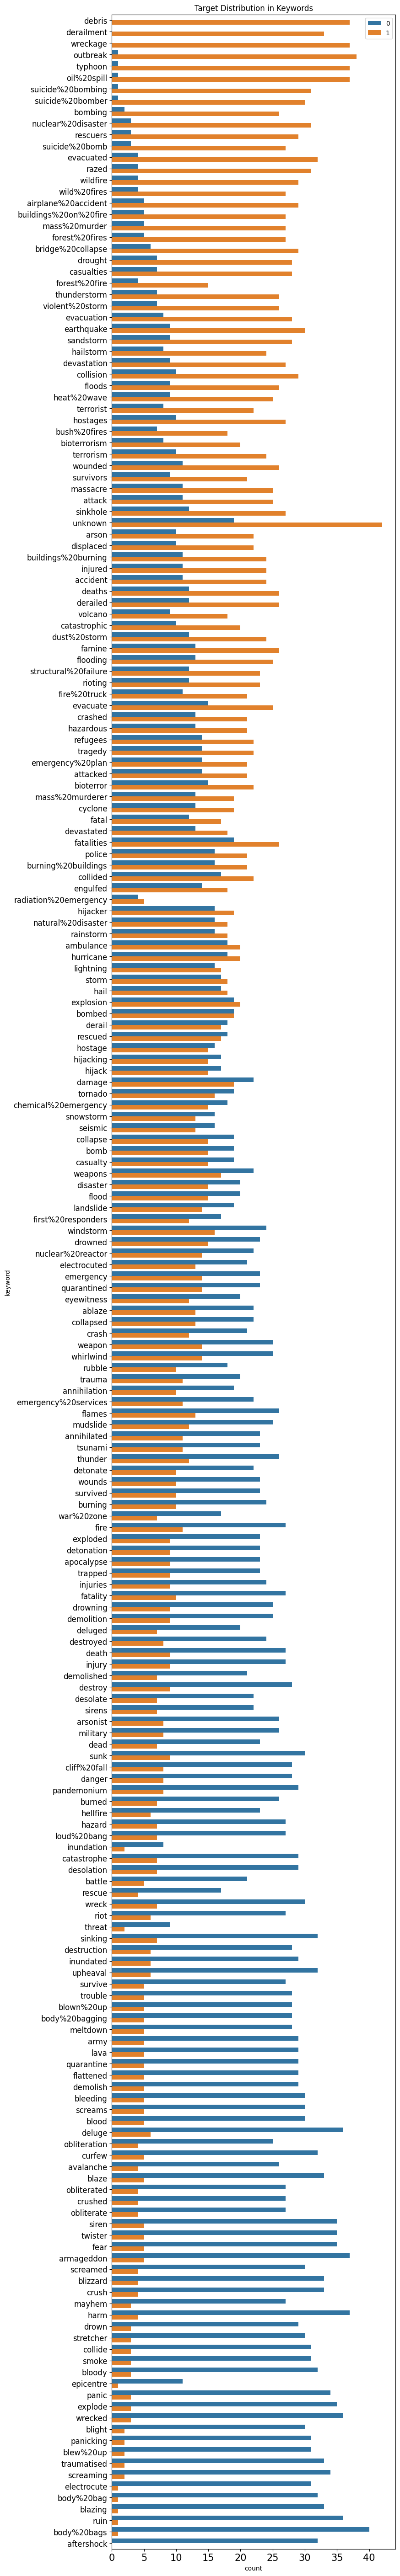

In [19]:
df['target_mean'] = df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df.drop(columns=['target_mean'], inplace=True)

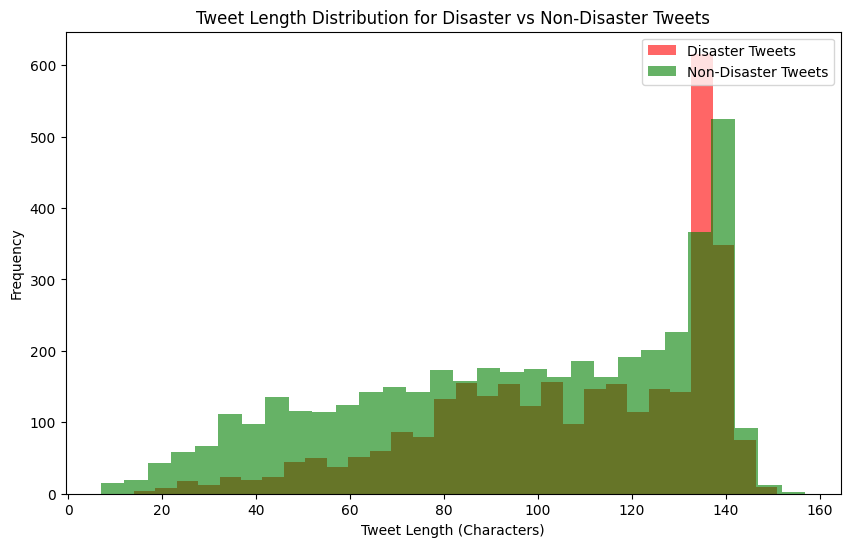

In [20]:
disaster_tweet_len = df[df['target'] == 1]['text'].str.len()
non_disaster_tweet_len = df[df['target'] == 0]['text'].str.len()

# Plotting both on the same histogram
plt.figure(figsize=(10, 6))
plt.hist(disaster_tweet_len, color='red', alpha=0.6, label='Disaster Tweets', bins=30)
plt.hist(non_disaster_tweet_len, color='green', alpha=0.6, label='Non-Disaster Tweets', bins=30)

# Adding titles and labels
plt.title('Tweet Length Distribution for Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Text Preprocessing

In [21]:
print(f"Example of disaster tweet: {df.text[df.target == 1].iloc[2]}")
print(f"Example of non-disaster tweet: {df.text[df.target == 0].iloc[41]}")

Example of disaster tweet: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Example of non-disaster tweet: RT @SleepJunkies: Sleeping pills double your risk of a car accident http://t.co/7s9Nm1fiCT


In [22]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import re
from nltk import word_tokenize
def clean_words(text):
    text = re.sub(r'(http.*)|#', '', text)
    tokens = word_tokenize(text)
    stops = stopwords.words('english')
    clean_tokens = [token.lower() for token in tokens if token.lower() not in stops and token.isalnum()]
    return ' '.join(clean_tokens)

In [24]:
df['text'] = df['text'].apply(clean_words)

In [25]:
#df['keyword'] = df['keyword'].apply(clean_words)
#dropping keyword 
df.drop('keyword',inplace=True,axis=1)

In [26]:
#lemmatizing using spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):

    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])

    return lemmatized_text

In [27]:
df['text'] = df['text'].apply(lemmatize_text)

In [28]:
df.sample(20)

,text,target
686,bit pacquiao vs marquez 3 unfilled blazing swa...,0
3223,recommend anyone job rn emergency service full...,0
6715,museawayfic beenghosting xylodemon ok ok make ...,1
865,bruh white people buy ugly shoe super tight bl...,0
6814,I m trap damn gas pump two suvs either side fu...,0
6153,argue cheap well,0
3363,faan order evacuation abandon aircraft mma,0
2129,silence palermo shipwreck child death,1
4633,laois girl advertise new friend replace bff in...,0
3054,earthquake drill atm,1


In [29]:
from nltk.probability import FreqDist
def make_freq(data):
    all_tweets = " ".join(data)

    tokens = word_tokenize(all_tweets)
    frequency = FreqDist(tokens)

    return frequency

make_freq(df["text"])

FreqDist({'get': 415, 'like': 390, 'fire': 346, 'amp': 323, 'go': 300, 'new': 217, 'one': 202, 'say': 195, 'people': 194, 'see': 181, ...})

In [30]:
disasters = df["text"][df.target == 1]
no_disasters = df["text"][df.target == 0]

make_freq(disasters)

FreqDist({'fire': 258, 'kill': 143, 'amp': 129, 'disaster': 118, 'news': 117, 'get': 113, 'california': 110, 'police': 107, 'bomb': 106, 'people': 103, ...})

In [31]:
make_freq(no_disasters)


FreqDist({'get': 302, 'like': 293, 'go': 213, 'amp': 194, 'new': 163, 'one': 134, 'make': 128, 'see': 126, 'body': 111, 'love': 108, ...})

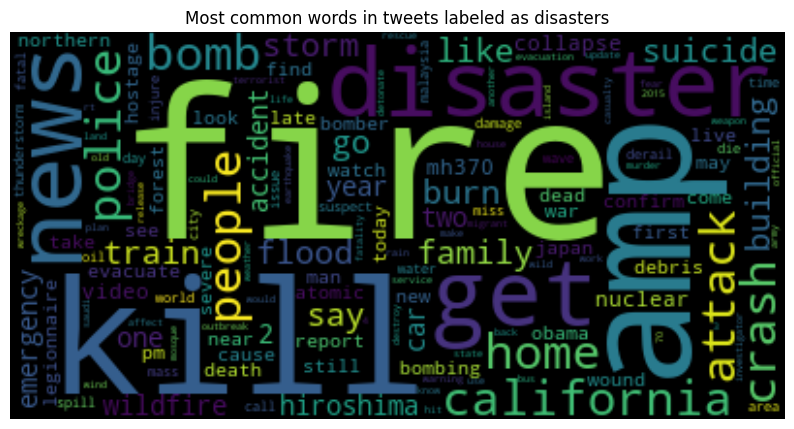

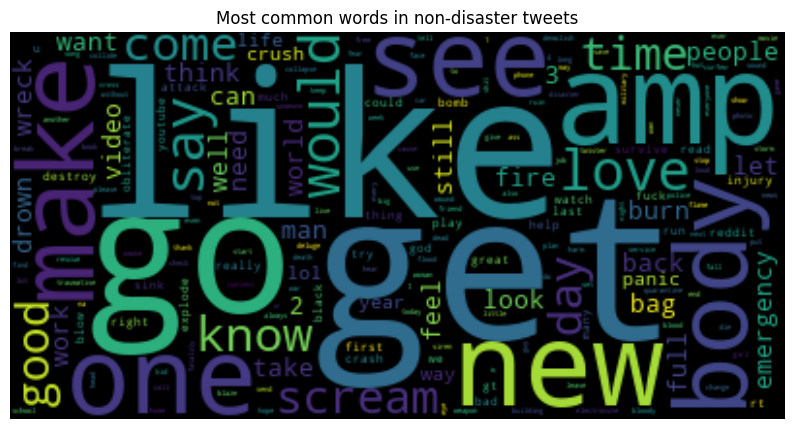

In [32]:
from wordcloud import WordCloud

def make_cloud(data, title = None):
    wordcloud = WordCloud().generate_from_frequencies(make_freq(data))

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

make_cloud(disasters, "Most common words in tweets labeled as disasters")
make_cloud(no_disasters, "Most common words in non-disaster tweets")

# Training Model With TF-IDF

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

vectorizer = CountVectorizer()

vectors = vectorizer.fit_transform(df["text"])
#test_vectors = vectorizer.transform(test_data["text"])
print(vectors[:1])

  (0, 3271)	1
  (0, 9700)	1
  (0, 3857)	1
  (0, 7477)	1
  (0, 726)	1
  (0, 4696)	1
  (0, 12824)	1


In [35]:
X = vectors
y = df['target']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = [str(text) if text is not None else "" for text in X_train]
X_test = [str(text) if text is not None else "" for text in X_test]

vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text into feature vectors (TF-IDF)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'NaiveBayes': MultinomialNB(),
    'LogisticRegression': LogisticRegression(random_state=42)
}

In [42]:
results = {}

In [43]:
from sklearn.metrics import classification_report, accuracy_score

for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
        # Train the model
        model.fit(X_train_tfidf, y_train)

        # Make predictions on the test and training sets
        y_test_pred = model.predict(X_test_tfidf)
        y_train_pred = model.predict(X_train_tfidf)

        # Evaluate the model on test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=False)

        # Evaluate the model on training set
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Store the results
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_classification_report': test_report
        }



    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")

Training RandomForest...
Training XGBoost...


c:\Users\krish\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training NaiveBayes...
Training LogisticRegression...


In [44]:
# Display the results
print("\nModel Evaluation Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Test Classification Report:\n{result['test_classification_report']}")
    print('-'*50)


Model Evaluation Results:
Model: RandomForest
Train Accuracy: 0.9827586206896551
Test Accuracy: 0.780649436713055
Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       877
           1       0.77      0.67      0.72       632

    accuracy                           0.78      1509
   macro avg       0.78      0.77      0.77      1509
weighted avg       0.78      0.78      0.78      1509

--------------------------------------------------
Model: XGBoost
Train Accuracy: 0.8597480106100795
Test Accuracy: 0.7720344599072233
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       877
           1       0.81      0.59      0.69       632

    accuracy                           0.77      1509
   macro avg       0.78      0.75      0.75      1509
weighted avg       0.78      0.77      0.76      1509

----------------------------------------

# Training Model with word2vec

In [45]:
from gensim.models import Word2Vec

# Prepare data for Word2Vec (list of tokenized words per document)
tokenized_texts = df['text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=300, window=5, min_count=2, workers=4)

# Check the vocabulary size
print(f"Vocabulary size: {len(w2v_model.wv)}")

Vocabulary size: 5143


In [47]:
def get_document_vector(words, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

# Create feature matrix
df['w2v_features'] = tokenized_texts.apply(lambda x: get_document_vector(x,w2v_model))

In [48]:
X = np.vstack(df['w2v_features'].values)
y = df['target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Define the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'NaiveBayes': MultinomialNB()
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions on the test and training sets
        y_test_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)

        # Evaluate the model on test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=False)

        # Evaluate the model on training set
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Store the results
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_classification_report': test_report
        }



    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")

Training RandomForest...
Training XGBoost...


c:\Users\krish\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LogisticRegression...
Training NaiveBayes...


c:\Users\krish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Display the results
print("\nModel Evaluation Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Test Classification Report:\n{result['test_classification_report']}")
    print('-'*50)


Model Evaluation Results:
Model: RandomForest
Train Accuracy: 0.9797745358090185
Test Accuracy: 0.6832339297548045
Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       877
           1       0.70      0.43      0.53       632

    accuracy                           0.68      1509
   macro avg       0.69      0.65      0.65      1509
weighted avg       0.69      0.68      0.66      1509

--------------------------------------------------
Model: XGBoost
Train Accuracy: 0.9797745358090185
Test Accuracy: 0.6719681908548708
Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       877
           1       0.63      0.52      0.57       632

    accuracy                           0.67      1509
   macro avg       0.66      0.65      0.65      1509
weighted avg       0.67      0.67      0.67      1509

---------------------------------------